In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds = pd.read_csv('NF-UQ-NIDS.csv')
ds.sample(5)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
2326561,192.168.1.35,51722,192.168.1.190,80,6,7.0,758,2239,5,6,27,55,1,xss,NF-ToN-IoT
6890694,193.111.198.10,59598,172.31.64.80,3389,6,0.0,2014,2103,14,9,219,4291214,0,Benign,NF-CSE-CIC-IDS2018
5783894,202.5.196.66,55126,172.31.65.116,445,6,0.0,498,342,5,4,30,4294316,0,Benign,NF-CSE-CIC-IDS2018
7393936,212.3.106.198,63941,172.31.64.121,3389,6,0.0,1376,1717,8,7,30,4291158,0,Benign,NF-CSE-CIC-IDS2018
9937335,172.31.69.25,80,52.14.136.135,52092,6,0.0,1136,0,4,0,27,0,0,Benign,NF-CSE-CIC-IDS2018


In [4]:
# 0 ----> benign
# 1 ----> attack

features = ['IPV4_SRC_ADDR',
'IPV4_DST_ADDR',
'L4_SRC_PORT',
'L4_DST_PORT',
'PROTOCOL',
'TCP_FLAGS',
'L7_PROTO',
'IN_BYTES',
'OUT_BYTES',
'IN_PKTS',
'OUT_PKTS',
'FLOW_DURATION_MILLISECONDS']


In [5]:
ds.shape

(11994893, 15)

In [6]:
ds.isnull().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
Dataset                       0
dtype: int64

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11994893 entries, 0 to 11994892
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   L7_PROTO                    float64
 6   IN_BYTES                    int64  
 7   OUT_BYTES                   int64  
 8   IN_PKTS                     int64  
 9   OUT_PKTS                    int64  
 10  TCP_FLAGS                   int64  
 11  FLOW_DURATION_MILLISECONDS  int64  
 12  Label                       int64  
 13  Attack                      object 
 14  Dataset                     object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.3+ GB


In [8]:
ds_dup = ds[ds.duplicated()]
print(ds_dup.shape)
ds_dup.head()

(1265854, 15)


,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
4023,10.40.85.10,0,192.168.241.50,0,1,81.0,168,0,2,0,0,0,0,Benign,NF-UNSW-NB15
4651,10.40.85.1,0,224.0.0.5,0,89,85.0,768,0,12,0,0,110009,0,Benign,NF-UNSW-NB15
4652,10.40.182.1,0,224.0.0.5,0,89,85.0,768,0,12,0,0,110009,0,Benign,NF-UNSW-NB15
7236,10.40.85.1,0,224.0.0.5,0,89,85.0,768,0,12,0,0,110009,0,Benign,NF-UNSW-NB15
7237,10.40.182.1,0,224.0.0.5,0,89,85.0,768,0,12,0,0,110009,0,Benign,NF-UNSW-NB15


In [9]:
ds.drop_duplicates(subset=features, keep='first', inplace=True)
ds.shape

(10265386, 15)

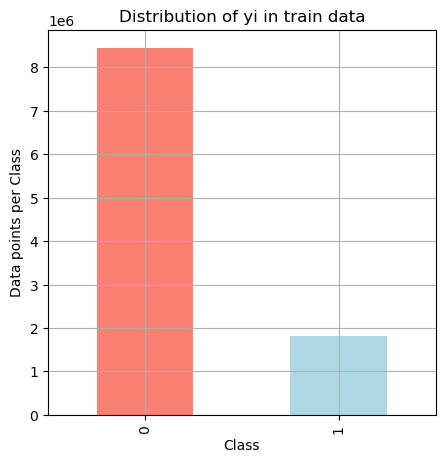

Number of data points in class [1] : 8440723 ( 82.225 %)
Number of data points in class [2] : 1824663 ( 17.775 %)


In [10]:
plt.figure(figsize=(5,5))
class_distribution = ds['Label'].value_counts()
sorted_yi = np.argsort(-class_distribution.values)
class_distribution.plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', [i+1], ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/ds.shape[0]*100), 3), '%)')

In [11]:
ds = ds.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Dataset'], axis=1)
ds.shape

(10265386, 11)

C:\Users\bhadr\AppData\Local\Temp\ipykernel_600\1413762376.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ds = ds.dropna('columns')# drop columns with NaN


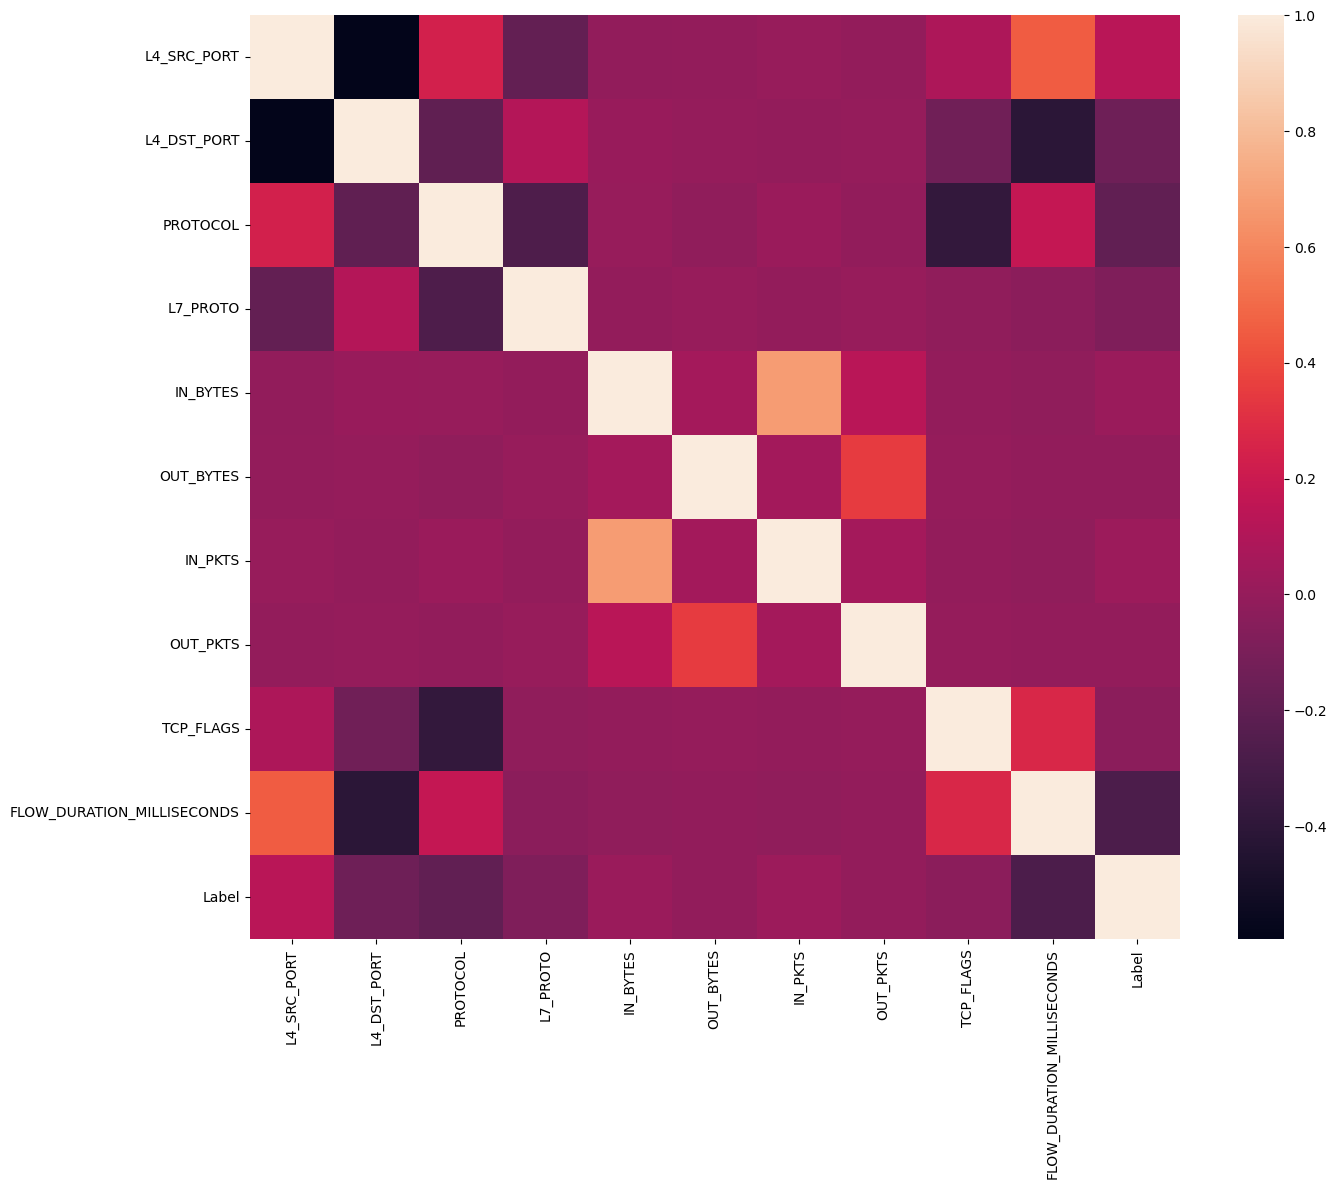

In [12]:
ds = ds.dropna('columns')# drop columns with NaN
ds = ds[[col for col in ds if ds[col].nunique() > 1]]# keep columns where there are more than 1 unique values
corr = ds.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [13]:
ds.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
0,62073,56082,6,0.0,9672,416,11,8,25,15,0
1,32284,1526,6,0.0,1776,104,6,2,25,0,0
2,21,21971,6,1.0,1842,1236,26,22,25,1111,0
3,23800,46893,6,0.0,528,8824,10,12,27,124,0
4,63062,21,6,1.0,1786,2340,32,34,25,1459,0


In [14]:
ds.to_csv('NIDS_preprocessed.csv', index=False)

In [23]:
df = ds.sample(n=494023)

In [24]:
df.shape

(494023, 11)

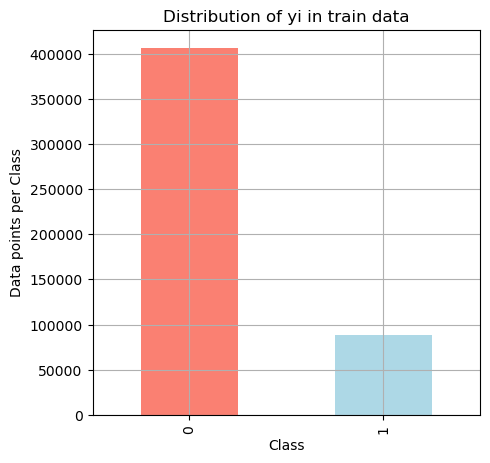

Number of data points in class [1] : 405905 ( 3.954 %)
Number of data points in class [2] : 88118 ( 0.858 %)


In [25]:
plt.figure(figsize=(5,5))
class_distribution = df['Label'].value_counts()
sorted_yi = np.argsort(-class_distribution.values)
class_distribution.plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', [i+1], ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/ds.shape[0]*100), 3), '%)')

In [27]:
df.to_csv('NF-UQ-NIDS_preprocessed.csv', index=False)